In [1]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

## Generating Synthetic Data:

In [2]:
def gen_data(n, h, sd1, sd2):
    x1 = ss.norm.rvs(-h, sd1, n)
    y1 = ss.norm.rvs(0, sd1, n)

    x2 = ss.norm.rvs(h, sd2, n)
    y2 = ss.norm.rvs(0, sd2, n)
    
    return (x1, y1, x2, y2)

In [3]:
(x1, y1, x2, y2) = gen_data(50, 1, 1, 1.5)

In [4]:
(x1, y1, x2, y2) = gen_data(1000, 1.5, 1, 1.5)

In [5]:
def plot_data(x1, y1, x2, y2):
    plt.figure()
    plt.plot(x1, y1, 'o', ms=2)
    plt.plot(x2, y2, 'o', ms=2)
    plt.xlabel("$X_1$")   #$ sign renders as latex
    plt.ylabel("$X_2$")

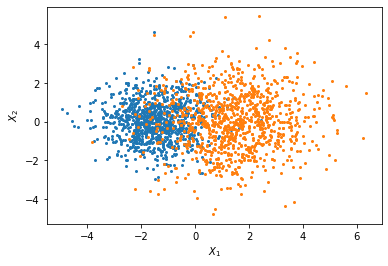

In [6]:
plot_data(x1, y1, x2, y2)

## Logistic Regression:

In [7]:
clf = LogisticRegression()    #Instantiate a classifier object

In [8]:
X = np.vstack((np.vstack((x1, y1)).T, np.vstack((x2, y2)).T))
X.shape

(2000, 2)

In [9]:
y = np.hstack((np.repeat(1,1000), np.repeat(2,1000)))
y.shape

(2000,)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=1)

In [11]:
y_test.shape

(1000,)

In [12]:
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
clf.score(X_test, y_test)

0.872

In [14]:
clf.predict_proba(np.array([-2, 0]).reshape(1,-1))

array([[0.97847382, 0.02152618]])

In [15]:
clf.predict(np.array([-2,0]).reshape(1,-1))

array([1])

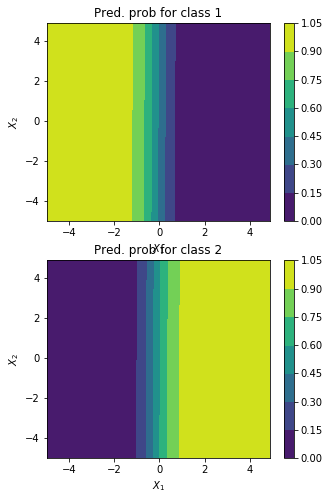

In [16]:
def plot_probs(ax, clf, class_no):
    xx1, xx2 = np.meshgrid(np.arange(-5, 5, 0.1), np.arange(-5, 5, 0.1))
    probs = clf.predict_proba(np.stack((xx1.ravel(), xx2.ravel()), axis=1))
    Z = probs[:,class_no]
    Z = Z.reshape(xx1.shape)
    CS = ax.contourf(xx1, xx2, Z)
    cbar = plt.colorbar(CS)
    plt.xlabel("$X_1$")
    plt.ylabel("$X_2$")
    
plt.figure(figsize=(5,8))
ax = plt.subplot(211)
plot_probs(ax, clf, 0)
plt.title("Pred. prob for class 1")
ax = plt.subplot(212)
plot_probs(ax, clf, 1)
plt.title("Pred. prob for class 2");